# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb

df.describe()


,Final_Grade,Mother_Education,Father_Education,studytime,failures,Grade_1,Grade_2
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.415190,2.749367,2.521519,2.035443,0.334177,10.908861,10.713924
std,4.581443,1.094735,1.088201,0.839240,0.743651,3.319195,3.761505
min,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,8.000000,2.000000,2.000000,1.000000,0.000000,8.000000,9.000000
50%,11.000000,3.000000,2.000000,2.000000,0.000000,11.000000,11.000000
75%,14.000000,4.000000,3.000000,2.000000,0.000000,13.000000,13.000000
max,20.000000,4.000000,4.000000,4.000000,3.000000,19.000000,19.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [8]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'Final_Grade': 2,
        'Mother_Education': 2,
        'Father_Education': 2,
        'Study_Time': 2,
        'Past_Failures': 2,
        'Grade_1': 2,
        'Grade_2': 2}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,Final_Grade,Mother_Education,Father_Education,studytime,failures,Grade_1,Grade_2
mean,10.42,2.75,2.52,2.035443,0.334177,10.91,10.71
median,11.00,3.00,2.00,2.000000,0.000000,11.00,11.00
mode,10.00,4.00,2.00,2.000000,0.000000,10.00,9.00


<br>

Let's repeat for a dispersion table:

</br>

In [9]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'Final_Grade': 2,
        'Mother_Education': 2,
        'Father_Education': 2,
        'Study_Time': 2,
        'Past_Failures': 2,
        'Grade_1': 2,
        'Grade_2': 2}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,Final_Grade,Mother_Education,Father_Education,studytime,failures,Grade_1,Grade_2
st.dev.,4.58,1.09,1.09,0.838177,0.742709,3.31,3.76
min,0.00,0.00,0.00,1.000000,0.000000,3.00,0.00
max,20.00,4.00,4.00,4.000000,3.000000,19.00,19.00
range,20.00,4.00,4.00,3.000000,3.000000,16.00,19.00
25th,8.00,2.00,2.00,1.000000,0.000000,8.00,9.00
75th,14.00,4.00,3.00,2.000000,0.000000,13.00,13.00
IQR,6.00,2.00,1.00,1.000000,0.000000,5.00,4.00


Let's save the variables in easier-to-use variable names:

In [10]:
y    = df['Final_Grade']
m_edu = df['Mother_Education']
f_edu = df['Father_Education']
st_t = df['studytime']
fail = df['failures']
g1 = df['Grade_1']
g2 = df['Grade_2']

Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

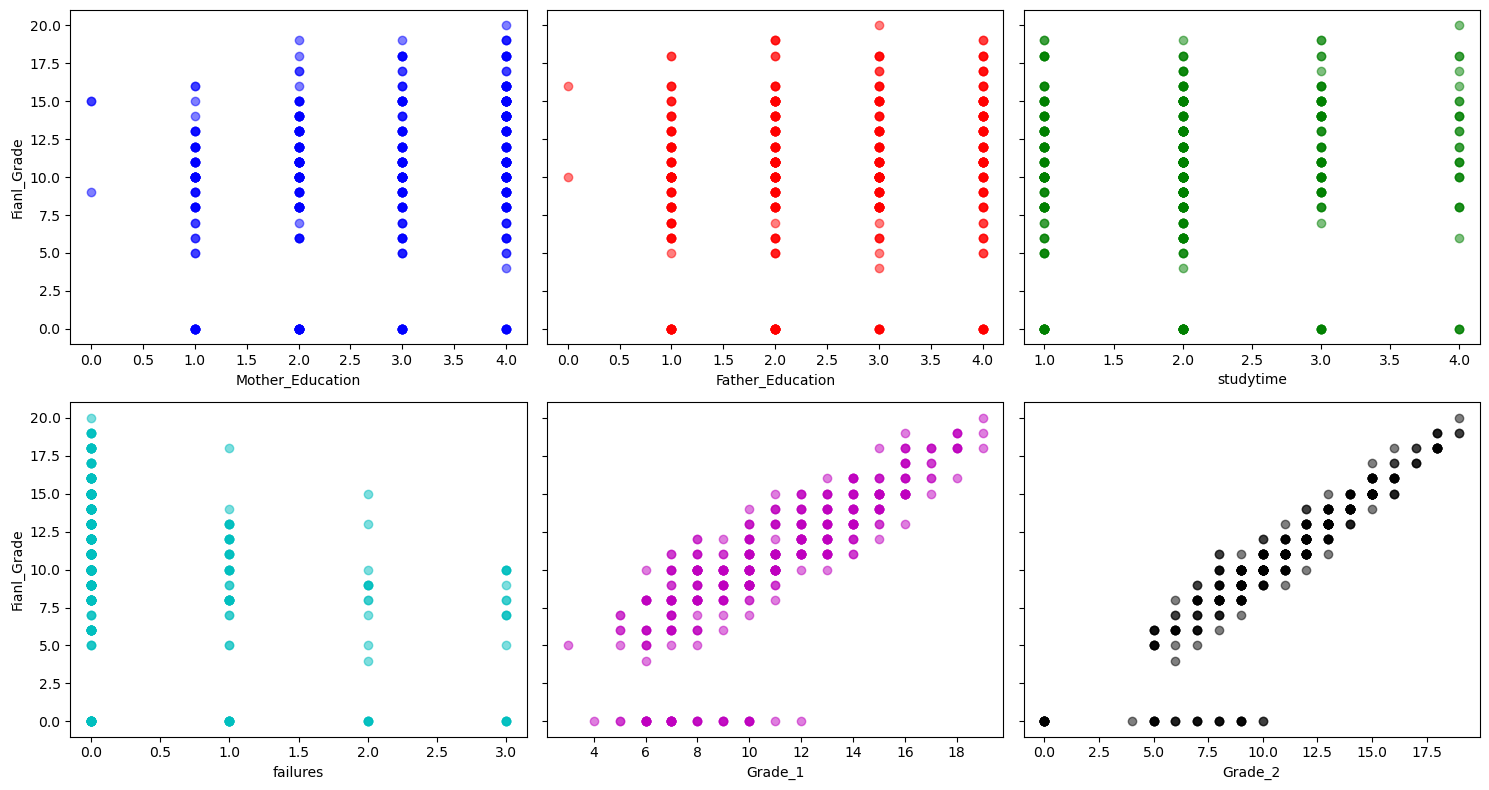

In [16]:

fig,axs = plt.subplots( 2, 3, figsize=(15,8), tight_layout=True )
axs[0, 0].scatter( m_edu, y, alpha=0.5, color='b' )
axs[0, 1].scatter( f_edu, y, alpha=0.5, color='r' )
axs[0, 2].scatter( st_t, y, alpha=0.5, color='g' )
axs[1, 0].scatter( fail, y, alpha=0.5, color='c' )
axs[1, 1].scatter( g1, y, alpha=0.5, color='m' )
axs[1, 2].scatter( g2, y, alpha=0.5, color='k' )

xlabels = 'Mother_Education', 'Father_Education', 'studytime' , 'failures', 'Grade_1', 'Grade_2'
[ax.set_xlabel(s) for ax,s in zip(axs.flat,xlabels)]
axs[0, 0].set_ylabel('Fianl_Grade')
axs[1, 0].set_ylabel('Fianl_Grade')
[ax.set_yticklabels([]) for ax in axs.flat if ax != axs[0, 0] and ax != axs[1, 0]]
plt.show()

The density xtick values are difficult to reach so let's make them easier to read:

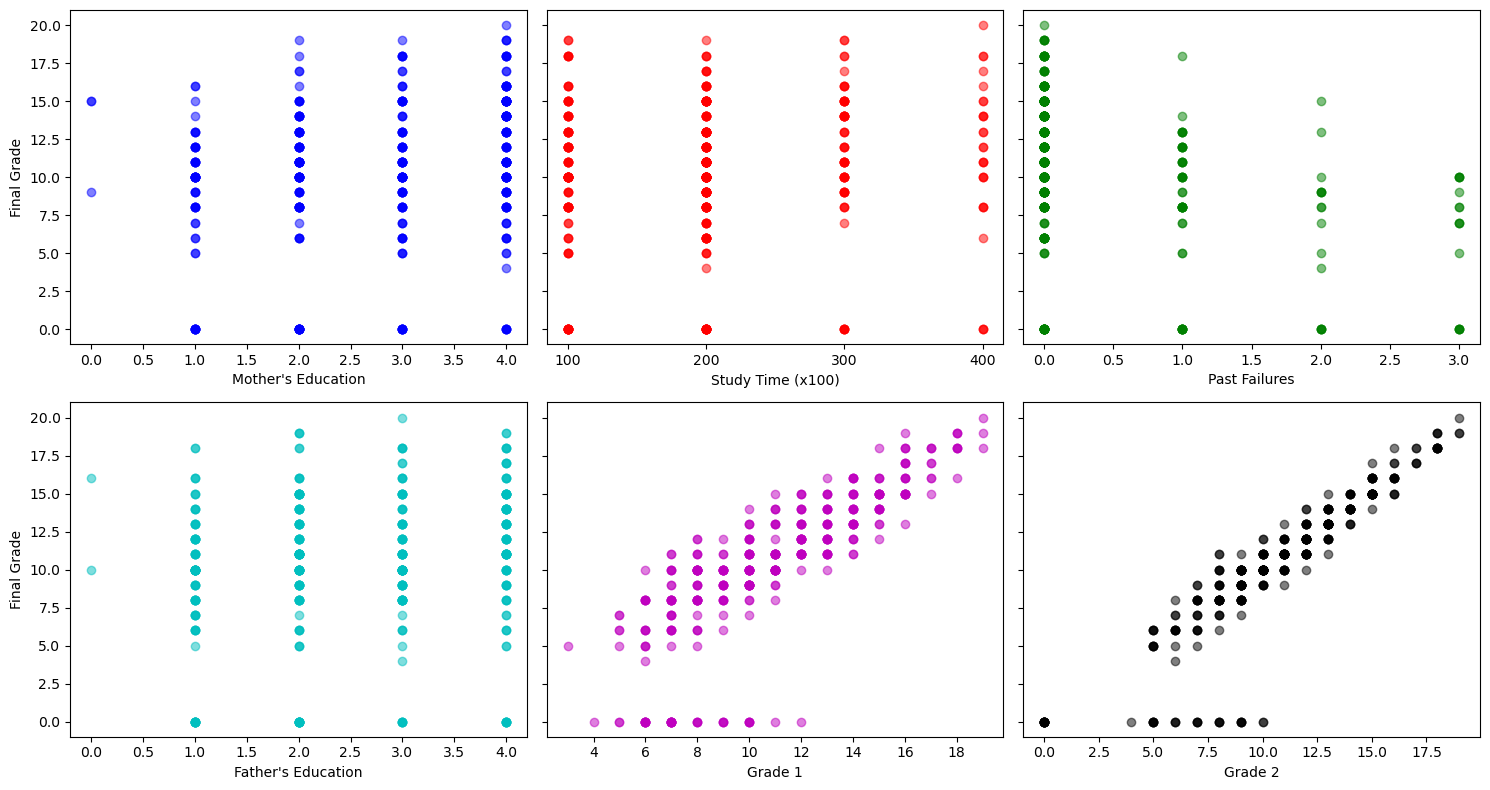

In [17]:
import numpy as np
from matplotlib import pyplot as plt

st_t1 = np.around(100*st_t, 0)


fig,axs = plt.subplots( 2, 3, figsize=(15, 8), tight_layout=True )


axs[0, 0].scatter( m_edu, y, alpha=0.5, color='b' ) 


axs[0, 1].scatter( st_t1, y, alpha=0.5, color='r' )


axs[0, 2].scatter( fail, y, alpha=0.5, color='g' )


axs[1, 0].scatter( f_edu, y, alpha=0.5, color='c' )


axs[1, 1].scatter( g1, y, alpha=0.5, color='m' )

axs[1, 2].scatter( g2, y, alpha=0.5, color='k' )


xlabels = [
    'Mother\'s Education', 'Study Time (x100)', 'Past Failures',
    'Father\'s Education', 'Grade 1', 'Grade 2'
]
[ax.set_xlabel(s) for ax,s in zip(axs.flat,xlabels)]


axs[0, 1].set_xticks([100, 200, 300, 400]) 


axs[0, 0].set_ylabel('Final Grade') 
axs[1, 0].set_ylabel('Final Grade') 


[ax.set_yticklabels([]) for ax in axs.flat if ax != axs[0, 0] and ax != axs[1, 0]] 


plt.savefig('fig_desc_scatter_6vars_v2.png')
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [19]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


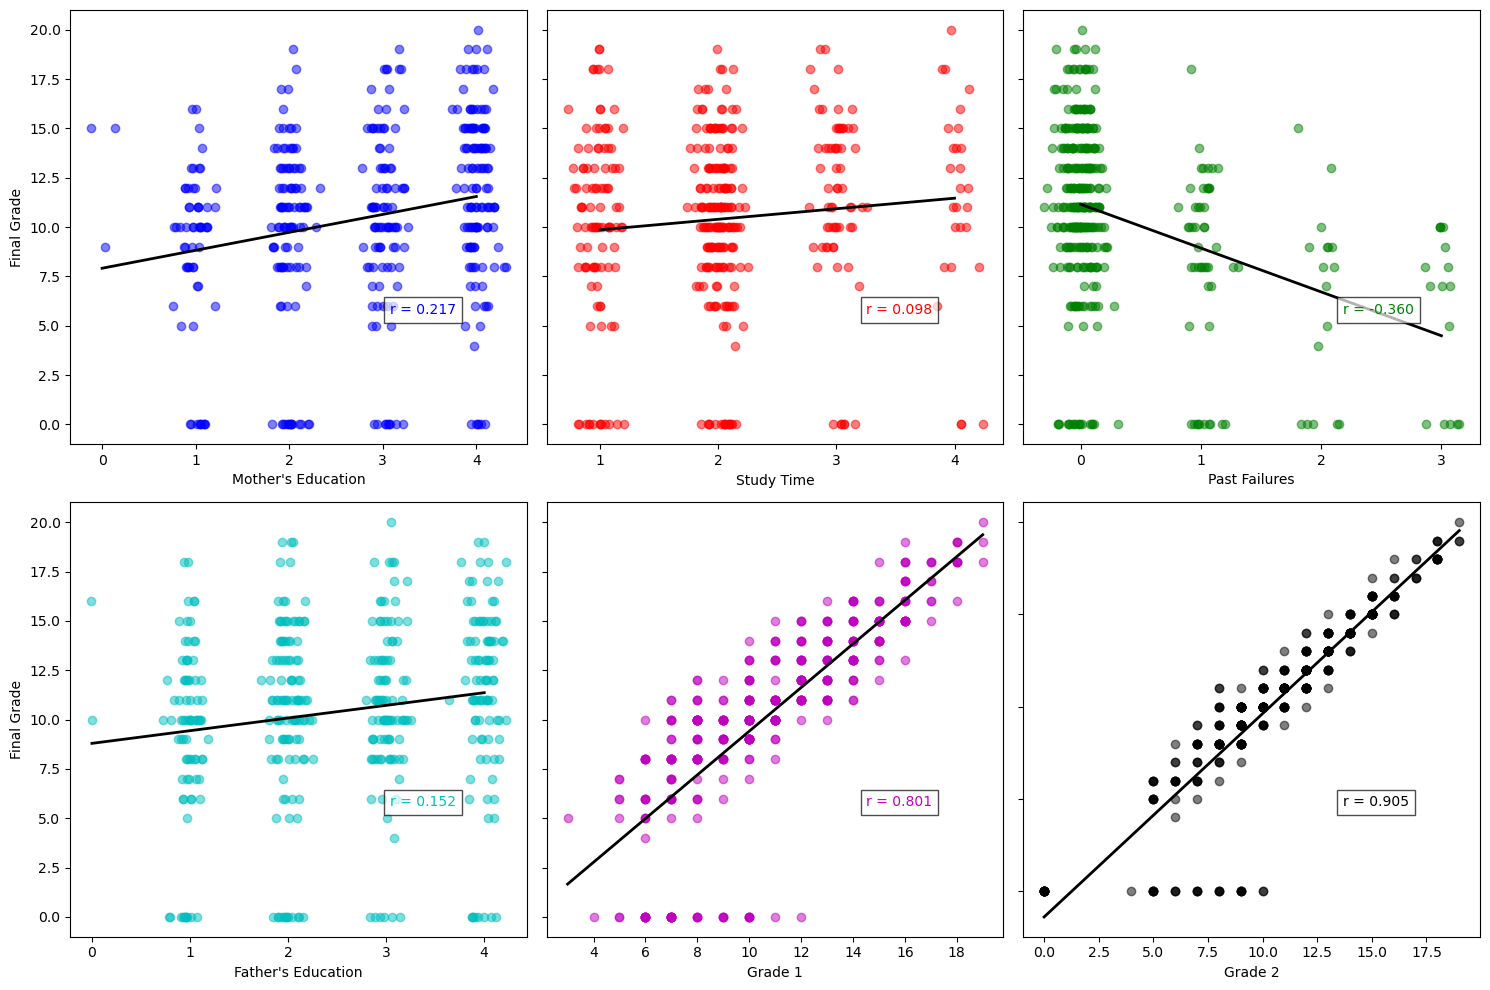

In [20]:
    
fig,axs = plt.subplots( 2, 3, figsize=(15, 10), tight_layout=True )


ivs     = [m_edu, st_t, fail, f_edu, g1, g2]

colors  = ['b', 'r', 'g', 'c', 'm', 'k']


xlabels = [
    'Mother\'s Education', 'Study Time', 'Past Failures',
    'Father\'s Education', 'Grade 1', 'Grade 2'
]

for i, (ax, x, c) in enumerate(zip(axs.flat, ivs, colors)):
   
    if x.dtype in ['int64', 'int32'] and x.max() <= 4:
         x_jitter = x + np.random.normal(0, 0.1, len(x))
    else:
         x_jitter = x
         
    ax.scatter( x_jitter, y, alpha=0.5, color=c )
    
   
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    

    r = corrcoeff(x, y)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, 
            bbox=dict(facecolor='white', alpha=0.7)) 

  
    ax.set_xlabel(xlabels[i])
    
   
    if xlabels[i] in ['Mother\'s Education', 'Father\'s Education', 'Study Time', 'Past Failures']:
        ax.set_xticks(np.arange(x.min(), x.max() + 1, 1))

    
    if i % 3 == 0:
        ax.set_ylabel('Final Grade')
    else:
     
        ax.set_yticklabels([])


plt.savefig('fig_desc_regression_6vars.png')
plt.show()

The correlation coefficients are all relatively low, suggesting no clear linear correlation between the DV and IVs.

However, in the sugar data (right panel above) it appears that there may be opposite trends for low-quality wines (quality <= 5) and high-quality wines (quality > 5).  Let's plot quality vs. sugar separately for the low- and high-quality groups, along with linear regression trends.

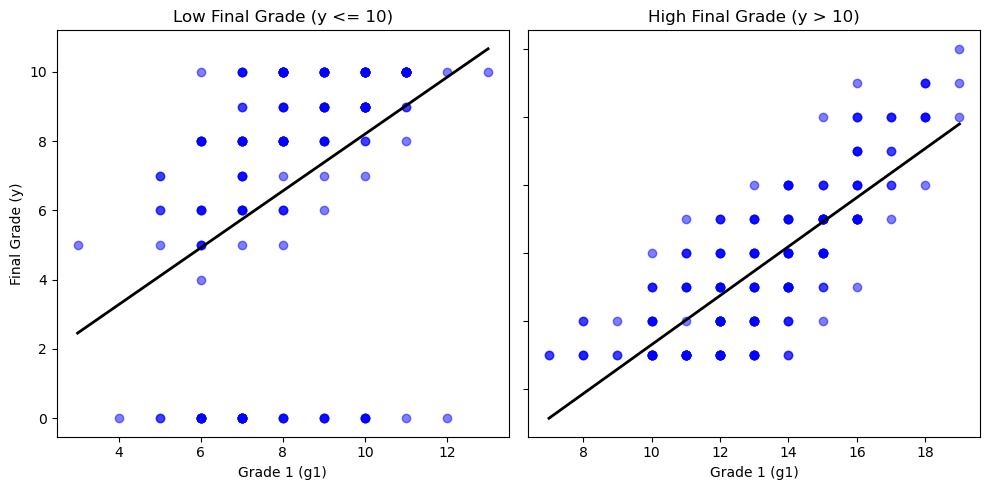

In [21]:
i_low  = y <= 10
i_high = y > 10


iv_plot = g1 
iv_label = 'Grade 1 (g1)'

fig,axs = plt.subplots( 1, 2, figsize=(10, 5), tight_layout=True )


for ax, i in zip(axs, [i_low, i_high]):
   
    ax.scatter( iv_plot[i], y[i], alpha=0.5, color='b' ) 
    
    
    plot_regression_line(ax, iv_plot[i], y[i], color='k', ls='-', lw=2)


[ax.set_xlabel(iv_label) for ax in axs] 


axs[0].set_title(f'Low Final Grade (y <= 10)')
axs[0].set_ylabel('Final Grade (y)')
axs[1].set_title(f'High Final Grade (y > 10)')


[ax.set_yticklabels([]) for ax in axs[1:]]


plt.savefig('fig_desc_split_g1.png')
plt.show()

The linear trend lines in the figures above appear to be opposite to the visual patterns:

- Quality appears to increase with sugar in low-quality wines
- Quality appears to descrease with sugar in low-quality wines

Linear regression suggests that the average pattern is opposite. To see why let's highlight the average for each wine quality score.

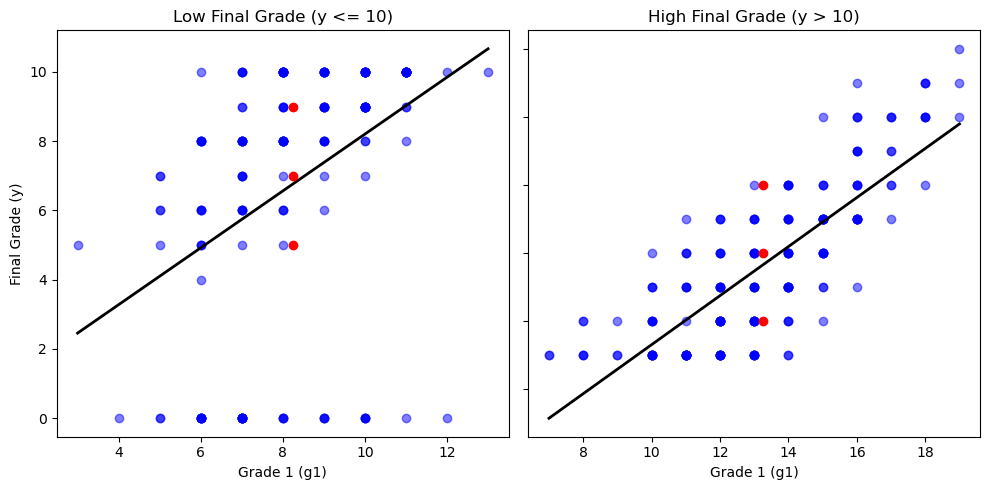

In [22]:
fig,axs = plt.subplots( 1, 2, figsize=(10, 5), tight_layout=True )


for ax, i in zip(axs, [i_low, i_high]):
    
    ax.scatter( iv_plot[i], y[i], alpha=0.5, color='b' )
    
    plot_regression_line(ax, iv_plot[i], y[i], color='k', ls='-', lw=2)


[axs[0].plot(iv_plot[i_low].mean(), q, 'ro') for q in [5, 7, 9]] 

[axs[1].plot(iv_plot[i_high].mean(), q, 'ro') for q in [12, 14, 16]] 

[ax.set_xlabel(iv_label) for ax in axs] 


axs[0].set_title('Low Final Grade (y <= 10)')
axs[0].set_ylabel('Final Grade (y)')
axs[1].set_title('High Final Grade (y > 10)')


[ax.set_yticklabels([]) for ax in axs[1:]]


plt.savefig('fig_desc_split_g1_means.png')
plt.show()


These analyses show that the trends associated with just the means are unclear.

Let's now assemble all results into a single figure for reporting purposes:

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

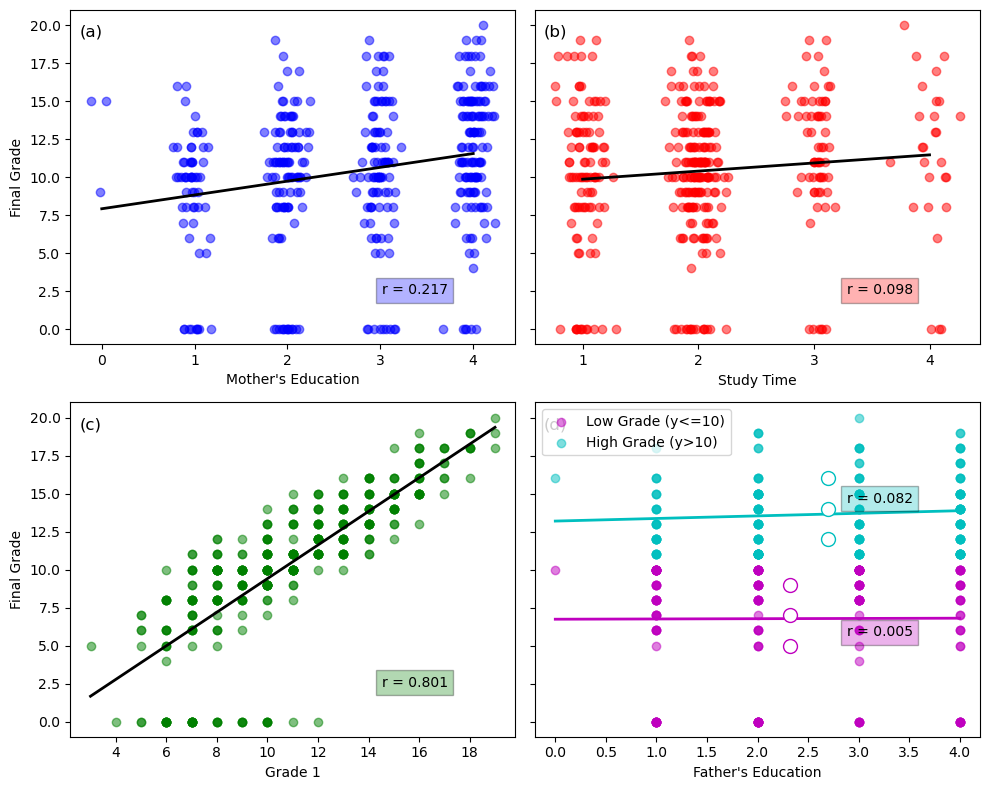

In [23]:
def plot_descriptive():
    import numpy as np
    from matplotlib import pyplot as plt
 
    fig,axs = plt.subplots( 2, 2, figsize=(10,8), tight_layout=True ) 
    
    
    ivs     = [m_edu, st_t, g1]
    colors  = 'b', 'r', 'g'
    

    for ax,x,c in zip(axs.flat[:3], ivs, colors):

        if x.dtype in ['int64', 'int32'] and x.max() <= 4:
            x_jitter = x + np.random.normal(0, 0.1, len(x))
        else:
            x_jitter = x
            
        ax.scatter( x_jitter, y, alpha=0.5, color=c )
        
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        
        r = corrcoeff(x, y)
        ax.text(0.7, 0.15, f'r = {r:.3f}', color='k', transform=ax.transAxes, 
                bbox=dict(facecolor=c, alpha=0.3)) 

    xlabels = ['Mother\'s Education', 'Study Time', 'Grade 1']
    [ax.set_xlabel(s) for ax,s in zip(axs.flat[:3], xlabels)]
    
    
    axs[0,1].set_xticks(np.arange(1, 5, 1)) 
    
    
    [ax.set_ylabel('Final Grade') for ax in axs[:,0]] 
    [ax.set_yticklabels([]) for ax in axs[:,1]]     

    
   

    ax      = axs[1,1]
    
    
    i_low   = y <= 10 
    i_high  = y > 10 
    
 
    iv_plot = f_edu
    
    fcolors = 'm', 'c'
    labels  = 'Low Grade (y<=10)', 'High Grade (y>10)'
    
    
    q_groups = [[5, 7, 9], [12, 14, 16]] 
    ylocs    = 0.3, 0.7 
    
    for i,c,s,qs,yloc in zip([i_low, i_high], fcolors, labels, q_groups, ylocs):
     
        ax.scatter( iv_plot[i], y[i], alpha=0.5, color=c, label=s ) 
        
        plot_regression_line(ax, iv_plot[i], y[i], color=c, ls='-', lw=2)
        
   
        [ax.plot(iv_plot[i].mean(), q, 'o', color=c, mfc='w', ms=10) for q in qs]
        
        r = corrcoeff(iv_plot[i], y[i])
        ax.text(0.7, yloc, f'r = {r:.3f}', color='k', transform=ax.transAxes, 
                bbox=dict(facecolor=c, alpha=0.3))

    ax.legend(loc='upper left')
    ax.set_xlabel('Father\'s Education')


    panel_labels = 'a', 'b', 'c', 'd'
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes) for ax,s in zip(axs.ravel(), panel_labels)]
    
    plt.savefig('fig_desc_combined.png')
   
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)

    
plot_descriptive()